<a href="https://colab.research.google.com/github/AgarwalMayank2/Face_Detection/blob/SVM_Ekta/Naive_bayes_PRML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Algorithm

In [7]:
import numpy as np

class NaiveBayesClassifier:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0) + 1e-9  # to prevent division by zero
            self.priors[c] = X_c.shape[0] / X.shape[0]

    # def calculate_likelihood(self, class_idx, x):
    #     mean = self.mean[class_idx]
    #     var = self.var[class_idx]
    #     exponent = -((x - mean) ** 2) / (2 * var)
    #     return np.sum(exponent - 0.5 * np.log(2 * np.pi * var))

    def _gaussian_pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- (x - mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = []
            for c in self.classes:
                log_prior = np.log(self.priors[c])
                log_likelihood = np.sum(np.log(self._gaussian_pdf(c, x)))
                posteriors.append(log_prior + log_likelihood)
            predictions.append(np.argmax(posteriors))
        return np.array(predictions)


# Naive Bayes on CNN features

# Loading filtered_CNN_features_dataset and filtering on basis of count of images per person

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
url_filtered_CNN_features_dataset = 'https://raw.githubusercontent.com/AgarwalMayank2/Face_Detection/refs/heads/main/processed_dataset/filtered_CNN_features_dataset.csv' #for CNN limited
df_CNN = pd.read_csv(url_filtered_CNN_features_dataset) # reading url for extracted CNN_features_dataset_limited.csv
df_CNN.drop('Unnamed: 0', axis=1, inplace=True)

# Filter persons with at least 80 images

#dropping those labels whose number of datapoints are less than 80
# Get the counts of each label
label_counts = df_CNN['2048'].value_counts()

# Filter out labels with counts less than 80
labels_to_keep = label_counts[label_counts >= 80].index

# Filter the DataFrame
df_CNN = df_CNN[df_CNN['2048'].isin(labels_to_keep)]

df_CNN

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
207,0.334396,1.031447,0.751403,0.061664,1.358539,0.131194,2.189165,0.168872,0.077561,0.128026,...,0.238129,0.033446,0.691363,1.453779,0.023197,1.180975,0.147620,0.132144,0.061259,Donald_Rumsfeld
208,0.052159,1.385429,0.948584,0.242452,0.765526,0.205163,2.773744,0.487321,0.375770,0.297134,...,0.151970,0.030394,0.931749,1.507545,0.074761,1.410434,0.187171,0.037343,0.192220,Donald_Rumsfeld
209,0.215924,1.243201,1.040831,0.082872,0.996569,0.093324,3.699462,0.166822,0.085976,0.420676,...,0.280522,0.046874,0.933633,1.932075,0.076832,1.779623,0.345520,0.009288,0.176782,Donald_Rumsfeld
210,0.273529,1.568788,1.131568,0.069734,1.060217,0.003534,3.313872,0.470634,0.280771,0.550614,...,0.392776,0.303419,0.718607,1.815761,0.034294,1.519493,0.046060,0.031623,0.141197,Donald_Rumsfeld
211,0.209844,1.102461,0.380182,0.109593,0.713786,0.054662,2.087155,0.206262,0.103134,0.152454,...,0.100046,0.225041,0.373597,0.834548,0.102522,0.784862,0.023190,0.141059,0.058093,Donald_Rumsfeld
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959,0.312240,1.009504,0.836836,0.018082,0.645396,0.066804,2.271123,0.094211,0.141208,0.130362,...,0.292594,0.216060,0.466659,0.785201,0.021710,0.663016,0.343248,0.060820,0.134825,Colin_Powell
3960,0.318314,1.077076,0.959523,0.018094,0.547238,0.033101,2.574726,0.171667,0.403900,0.141492,...,0.184252,0.081133,0.731656,1.326214,0.040101,1.001839,0.011269,0.099451,0.093939,Colin_Powell
3961,0.344084,0.716365,1.162212,0.025244,1.336606,0.032508,3.778199,0.205079,0.106398,0.161860,...,0.078263,0.198066,0.789224,1.613293,0.019929,1.323015,0.041566,0.020037,0.051515,Colin_Powell
3962,0.349864,0.792629,0.792507,0.079453,1.206452,0.083974,2.950798,0.072012,0.180612,0.077492,...,0.130345,0.346125,0.530768,1.389377,0.117860,1.205199,0.044289,0.032452,0.238427,Colin_Powell


# Splitting dataframe into train and test in 4:1 ratio

In [11]:
# Separate features and labels
X = df_CNN.iloc[:, :-1]
y = df_CNN.iloc[:, -1]

# Encode labels (alphabetically)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# encoding is benificial as working on numbers is lot easier than working on string

# Ensure stratified split (16 training, 4 testing per class)
X_train_CNN, X_test_CNN, y_train_CNN, y_test_CNN = train_test_split(X, y_encoded, test_size=1/5, random_state=42, stratify=y_encoded)

# Normalize features
scaler = StandardScaler()
X_train_CNN = scaler.fit_transform(X_train_CNN)
X_test_CNN = scaler.transform(X_test_CNN)

print(f"Dataset size: {df_CNN.shape}")
print(f"Training size: {X_train_CNN.shape}, Testing size: {X_test_CNN.shape}")

nb_CNN = NaiveBayesClassifier()
nb_CNN.fit(X_train_CNN, y_train_CNN)
y_pred_train_CNN = nb_CNN.predict(X_train_CNN)
y_pred_test_CNN = nb_CNN.predict(X_test_CNN)

train_acc_CNN = np.mean(y_pred_train_CNN == y_train_CNN)
test_acc_CNN = np.mean(y_pred_test_CNN == y_test_CNN)

Dataset size: (1140, 2049)
Training size: (912, 2048), Testing size: (228, 2048)


# CNN accuracy plot

CNN Train Accuracy: 57.57 %
CNN Test Accuracy: 39.47 %


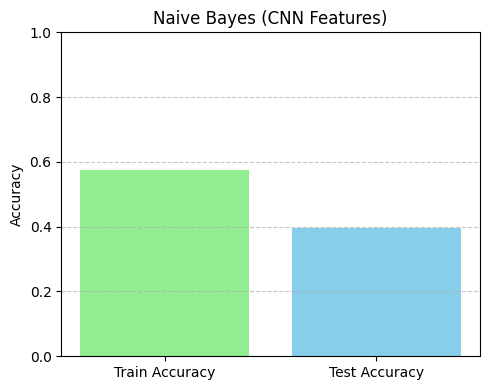

In [12]:
print("CNN Train Accuracy:", round(train_acc_CNN * 100, 2), "%")
print("CNN Test Accuracy:", round(test_acc_CNN * 100, 2), "%")

plt.figure(figsize=(5, 4))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc_CNN, test_acc_CNN], color=["lightgreen", "skyblue"])
plt.title("Naive Bayes (CNN Features)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Naive Bayes on LBP features**

# Loading filtered_LDA_features_dataset and filtering on basis of count of images per person

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

url_filtered_LBP_features_dataset = 'https://raw.githubusercontent.com/AgarwalMayank2/Face_Detection/refs/heads/main/processed_dataset/filtered_LBP_features_dataset.csv' #for CNN limited
df_LBP = pd.read_csv(url_filtered_LBP_features_dataset) # reading url for extracted CNN_features_dataset_limited.csv
df_LBP.drop('Unnamed: 0', axis=1, inplace=True)

#dropping those labels whose number of datapoints are less than 80
# Get the counts of each label
label_counts = df_LBP['256'].value_counts()

# Filter out labels with counts less than 80
labels_to_keep = label_counts[label_counts >= 80].index

# Filter the DataFrame
df_LBP = df_LBP[df_LBP['256'].isin(labels_to_keep)]

df_LBP

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
199,747.0,72.0,433.0,185.0,61.0,6.0,224.0,354.0,392.0,30.0,...,498.0,3001.0,734.0,36.0,578.0,616.0,546.0,453.0,12702.0,George_W_Bush
200,516.0,33.0,438.0,186.0,34.0,2.0,172.0,316.0,243.0,23.0,...,341.0,2309.0,466.0,24.0,354.0,500.0,426.0,516.0,17530.0,George_W_Bush
201,805.0,76.0,366.0,204.0,68.0,10.0,181.0,307.0,537.0,54.0,...,529.0,2171.0,559.0,37.0,413.0,581.0,438.0,537.0,22703.0,George_W_Bush
202,572.0,42.0,304.0,219.0,37.0,3.0,247.0,736.0,587.0,22.0,...,624.0,3621.0,582.0,28.0,273.0,590.0,465.0,315.0,3466.0,George_W_Bush
203,577.0,49.0,403.0,268.0,87.0,4.0,334.0,641.0,494.0,34.0,...,564.0,1535.0,548.0,21.0,284.0,500.0,448.0,280.0,4402.0,George_W_Bush
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,510.0,57.0,358.0,277.0,61.0,2.0,276.0,473.0,325.0,25.0,...,477.0,2048.0,667.0,27.0,395.0,615.0,504.0,392.0,6207.0,Tony_Blair
3335,680.0,57.0,496.0,208.0,69.0,9.0,200.0,365.0,332.0,26.0,...,430.0,2359.0,540.0,37.0,465.0,703.0,660.0,706.0,13144.0,Tony_Blair
3336,800.0,69.0,321.0,224.0,57.0,6.0,225.0,362.0,406.0,48.0,...,488.0,2234.0,723.0,28.0,590.0,850.0,458.0,677.0,13253.0,Tony_Blair
3337,351.0,25.0,197.0,141.0,27.0,4.0,142.0,455.0,247.0,13.0,...,347.0,5927.0,710.0,18.0,413.0,631.0,311.0,399.0,11066.0,Tony_Blair


# Splitting dataframe into train, validation and test in 4:1 ratio

In [14]:
# Separate features and labels
X = df_LBP.iloc[:, :-1]
y = df_LBP.iloc[:, -1]

# Encode labels (alphabetically)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# encoding is benificial as working on numbers is lot easier than working on string

# Ensure stratified split of atleast (64 training, 16 testing per class)
X_train_LBP, X_test_LBP, y_train_LBP, y_test_LBP = train_test_split(X, y_encoded, test_size=1/5, random_state=42, stratify=y_encoded)

# Normalize features
scaler = StandardScaler()
X_train_LBP = scaler.fit_transform(X_train_LBP)
X_test_LBP = scaler.transform(X_test_LBP)

print(f"Dataset size: {df_LBP.shape}")
print(f"After applying LDA => Training size: {X_train_LBP.shape}, Testing size: {X_test_LBP.shape}")

nb_LBP = NaiveBayesClassifier()
nb_LBP.fit(X_train_LBP, y_train_LBP)
y_pred_train_LBP = nb_LBP.predict(X_train_LBP)
y_pred_test_LBP = nb_LBP.predict(X_test_LBP)

train_acc_LBP = np.mean(y_pred_train_LBP == y_train_LBP)
test_acc_LBP = np.mean(y_pred_test_LBP == y_test_LBP)

Dataset size: (1140, 257)
After applying LDA => Training size: (912, 256), Testing size: (228, 256)


# LBP accuracy plot

LBP Train Accuracy: 38.93 %
LBP Test Accuracy: 28.51 %


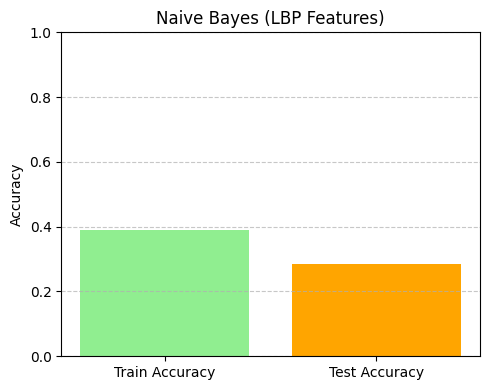

In [15]:
print("LBP Train Accuracy:", round(train_acc_LBP * 100, 2), "%")
print("LBP Test Accuracy:", round(test_acc_LBP * 100, 2), "%")

plt.figure(figsize=(5, 4))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc_LBP, test_acc_LBP], color=["lightgreen", "orange"])
plt.title("Naive Bayes (LBP Features)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()